## Preprocessing

In [1]:
# Import required libraries
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load dataset
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'
application_df = application_df.drop(columns=['EIN', 'NAME'])

In [3]:
# Determine the number of unique values in each column
unique_values = application_df.nunique()
print(unique_values)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [4]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_counts = application_df["APPLICATION_TYPE"].value_counts()
print(application_type_counts)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [5]:
# Define cutoff threshold for application types
cutoff = 500
application_types_to_replace = list(application_type_counts[application_type_counts < cutoff].index)
print("Application types to be replaced:", application_types_to_replace)


Application types to be replaced: ['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']


In [6]:
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")


In [7]:
# Check the value counts for APPLICATION_TYPE after replacement
print(application_df['APPLICATION_TYPE'].value_counts())

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64


In [8]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_counts = application_df["CLASSIFICATION"].value_counts()
print(classification_counts)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


In [9]:
# Define cutoff threshold for classification
classification_cutoff = 1000
classifications_to_replace = list(classification_counts[classification_counts < classification_cutoff].index)
print("Classifications to be replaced:", classifications_to_replace)

Classifications to be replaced: ['C7000', 'C1700', 'C4000', 'C5000', 'C1270', 'C2700', 'C2800', 'C7100', 'C1300', 'C1280', 'C1230', 'C1400', 'C7200', 'C2300', 'C1240', 'C8000', 'C7120', 'C1500', 'C1800', 'C6000', 'C1250', 'C8200', 'C1238', 'C1278', 'C1235', 'C1237', 'C7210', 'C2400', 'C1720', 'C4100', 'C1257', 'C1600', 'C1260', 'C2710', 'C0', 'C3200', 'C1234', 'C1246', 'C1267', 'C1256', 'C2190', 'C4200', 'C2600', 'C5200', 'C1370', 'C1248', 'C6100', 'C1820', 'C1900', 'C1236', 'C3700', 'C2570', 'C1580', 'C1245', 'C2500', 'C1570', 'C1283', 'C2380', 'C1732', 'C1728', 'C2170', 'C4120', 'C8210', 'C2561', 'C4500', 'C2150']


In [10]:
# Replace rare classifications with "Other"
for cls in classifications_to_replace:
    application_df["CLASSIFICATION"] = application_df["CLASSIFICATION"].replace(cls, "Other")


In [11]:
# Verify the replacement was successful
print(application_df["CLASSIFICATION"].value_counts())

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64


In [12]:
# Convert categorical data to numeric using pd.get_dummies
application_df = pd.get_dummies(application_df)

In [13]:
# Define target and feature variables
X = application_df.drop("IS_SUCCESSFUL", axis=1)
y = application_df["IS_SUCCESSFUL"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [14]:
# Define a more complex neural network model
nn_opt = tf.keras.models.Sequential()

# Input layer
nn_opt.add(tf.keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1],)))

# First hidden layer with more neurons and ReLU activation
nn_opt.add(tf.keras.layers.Dense(units=256, activation='relu'))

# Second hidden layer with more neurons and ReLU activation
nn_opt.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Optional: Add Dropout layers to prevent overfitting
nn_opt.add(tf.keras.layers.Dropout(0.3))

# Third hidden layer with ReLU activation
nn_opt.add(tf.keras.layers.Dense(units=64, activation='relu'))

# Output layer with sigmoid activation for binary classification
nn_opt.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
nn_opt.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Check model structure
nn_opt.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │          11,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,481 (205.00 KB)

 Trainable params: 52,481 (205.00 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Reduce learning rate on plateau
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model with callbacks
history_opt = nn_opt.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test),
                         callbacks=[early_stopping, lr_scheduler])

# Evaluate the optimized model
model_loss_opt, model_accuracy_opt = nn_opt.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Optimized Model - Loss: {model_loss_opt}, Accuracy: {model_accuracy_opt}")


Epoch 1/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7126 - loss: 0.5820 - val_accuracy: 0.7208 - val_loss: 0.5637 - learning_rate: 0.0010
Epoch 2/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7281 - loss: 0.5587 - val_accuracy: 0.7227 - val_loss: 0.5658 - learning_rate: 0.0010
Epoch 3/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7300 - loss: 0.5569 - val_accuracy: 0.7251 - val_loss: 0.5632 - learning_rate: 0.0010
Epoch 4/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7316 - loss: 0.5528 - val_accuracy: 0.7289 - val_loss: 0.5563 - learning_rate: 0.0010
Epoch 5/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7329 - loss: 0.5546 - val_accuracy: 0.7271 - val_loss: 0.5577 - learning_rate: 0.0010
Epoch 6/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7341 - loss: 0.5465 - val_accuracy: 0.7267 - val_loss: 0.5569 - learning_rate: 0.0010
Epoch 7/100
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7296 - loss: 0

In [16]:
# Save the optimized model
nn_opt.save('AlphabetSoupCharity_Optimization.h5')


In [17]:
from google.colab import files
files.download('AlphabetSoupCharity_Optimization.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

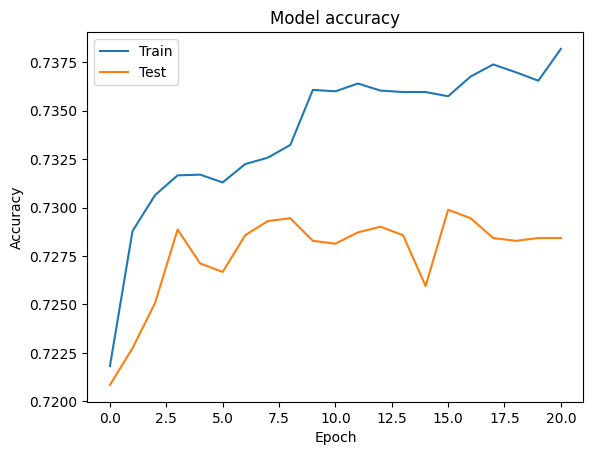

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

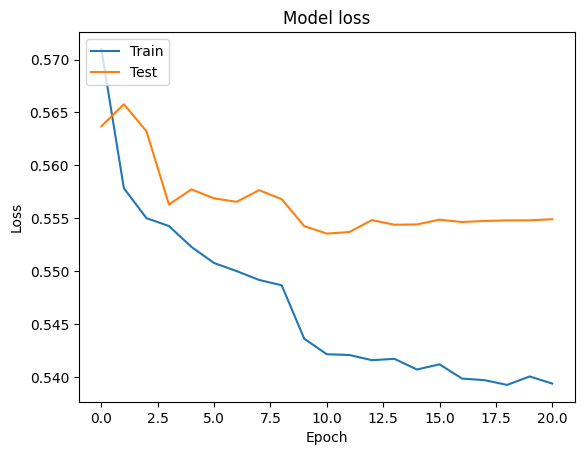

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history_opt.history['accuracy'])
plt.plot(history_opt.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Save the plot as a PNG file
plt.savefig('accuracy_plot_optimized.png')
# Clear the plot after saving to avoid conflicts
plt.clf()
# Download the saved plot
files.download('accuracy_plot_optimized.png')

# Plot training & validation loss values
plt.plot(history_opt.history['loss'])
plt.plot(history_opt.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Save the plot as a PNG file
plt.savefig('loss_plot_optimized.png')
# Clear the plot after saving to avoid conflicts
plt.clf()
# Download the saved plot
files.download('loss_plot_optimized.png')